### Overview : Assignment 1 - Use clustering techniques for a customer dataset using machine learning
### Clustering on Credit Card details
##### Dataset is from <a href="https://www.kaggle.com/datasets/arjunbhasin2013/ccdata">Kaggle </a>. In this scenario, the objective is to construct a customer segmentation model for the purpose of delineating an effective marketing strategy. The dataset in question encapsulates the usage patterns of approximately 9000 active credit card holders over the preceding 6 months. The dataset is structured at a customer level and encompasses 18 distinct behavioral variables, offering a comprehensive view of customer interactions and behaviors

In [1]:
#importing relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 


In [2]:
#load dataset
data = pd.read_csv("CC GENERAL.csv")
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [3]:
#dataset info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [4]:
#checking the no. of columns and rows we are working with
data.shape

(8950, 18)

In [5]:
#check for the sum of null values
data.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

The minimum payments have the highest number of null values, the best thing to do here is to fill in with 0 to avoid any interference with the whole of the dataset


In [6]:
#replacing the null values with 0
data.fillna(value=0, inplace=True)

In [7]:
#confirm they are replaced
data.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [8]:
data.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4493.947277,1733.143852,833.983453,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.922543,2895.063757,2335.989918,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,163.028164,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,289.628402,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,788.713501,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


## EDA 

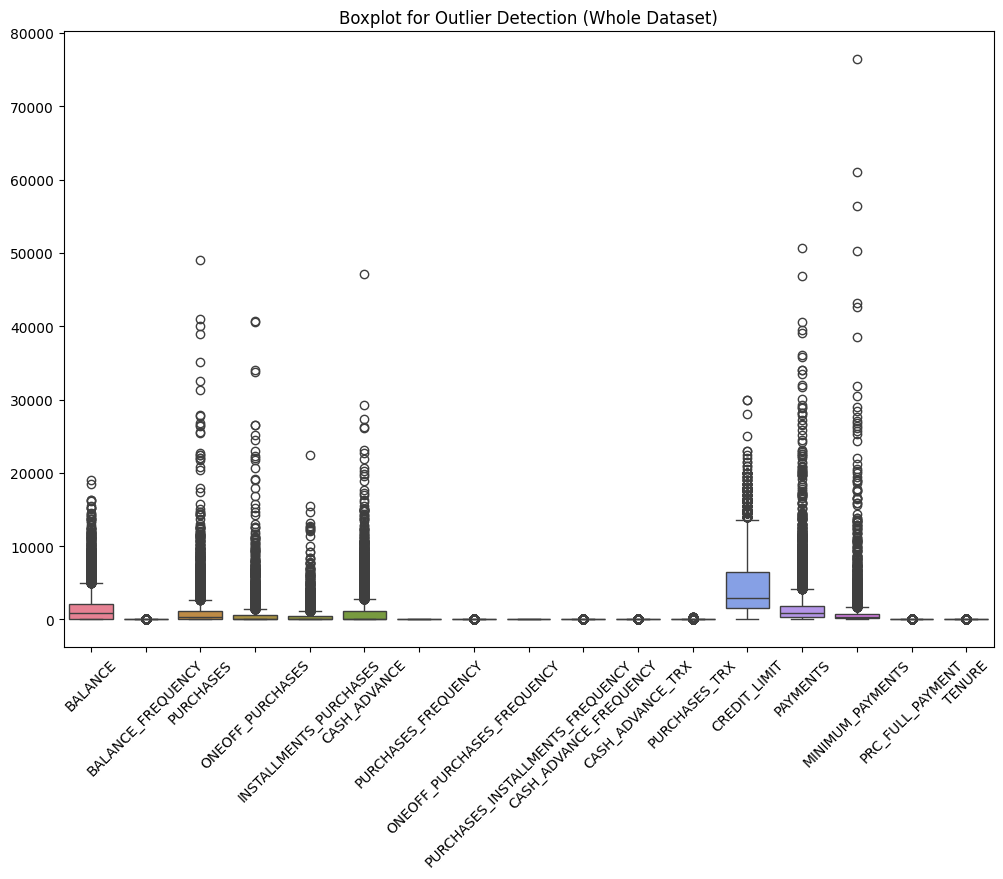

In [9]:
#check for outliers
plt.figure(figsize=(12,8))
sns.boxplot(data=data)
plt.title('Boxplot for Outlier Detection (Whole Dataset)')
plt.xticks(rotation=45)
plt.show()


### MODELLING

In [10]:
#remove the outliers 
numeric_data = data.select_dtypes(include=['number'])

# Remove non-numeric values 
numeric_data = numeric_data.apply(pd.to_numeric, errors='coerce').dropna()

# Calculate quantiles using IQR method
Q1 = numeric_data.quantile(0.25)
Q3 = numeric_data.quantile(0.75)
IQR = Q3 - Q1

#threshold IQR 1.5
threshold = 1.5
outliers = ((numeric_data < (Q1 - threshold * IQR)) | (numeric_data > (Q3 + threshold * IQR))).any(axis=1)

# Remove rows containing outliers from the original data
data_no_outliers = data[~outliers]



In [11]:
#standard scaling the features
from sklearn.preprocessing import StandardScaler

numeric_data = data.select_dtypes(include=['number'])

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the data
scaled_data = scaler.fit_transform(numeric_data)

# Create a DataFrame with the scaled data
scaled_df = pd.DataFrame(scaled_data, columns=numeric_data.columns)

# Concatenate the non-numeric columns with the scaled numeric columns
final_data = pd.concat([data.select_dtypes(exclude=['number']), scaled_df], axis=1)


In [12]:
scaled_df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.731989,-0.249434,-0.424900,-0.356934,-0.349079,-0.466786,-0.806490,-0.678661,-0.707313,-0.675349,-0.476070,-0.511333,-0.960213,-0.528979,-0.297310,-0.525551,0.36068
1,0.786961,0.134325,-0.469552,-0.356934,-0.454576,2.605605,-1.221758,-0.678661,-0.916995,0.573963,0.110074,-0.591796,0.688718,0.818642,0.102042,0.234227,0.36068
2,0.447135,0.518084,-0.107668,0.108889,-0.454576,-0.466786,1.269843,2.673451,-0.916995,-0.675349,-0.476070,-0.109020,0.826129,-0.383805,-0.088489,-0.525551,0.36068
3,0.049099,-1.016953,0.232058,0.546189,-0.454576,-0.368653,-1.014125,-0.399319,-0.916995,-0.258913,-0.329534,-0.551565,0.826129,-0.598688,-0.357035,-0.525551,0.36068
4,-0.358775,0.518084,-0.462063,-0.347294,-0.454576,-0.466786,-1.014125,-0.399319,-0.916995,-0.675349,-0.476070,-0.551565,-0.905249,-0.364368,-0.252238,-0.525551,0.36068


In [13]:
#check for null values in the scaled dataset
scaled_df.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

K-Means Clustering

In [14]:
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")

kmeans = KMeans(n_clusters=4, max_iter=50)
kmeans.fit(scaled_df)

KMeans(max_iter=50, n_clusters=4)

In [15]:
#clustering model display
kmeans.labels_

array([0, 2, 1, ..., 1, 0, 0])

In [20]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

numeric_features = data.select_dtypes(include=['float64', 'int64']).columns
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)
    ])

scaled_df = preprocessor.fit_transform(data)


In [47]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

silhouette_scores = []
num_clusters_list = range(2, 9)

max_silhouette_score = -1  # Initialize with a value lower than silhouette scores
optimal_num_clusters = -1

for num_clusters in num_clusters_list:
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(scaled_df)
    
    # silhouette score
    silhouette_avg = silhouette_score(scaled_df, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    
    # Checking if the current silhouette score is the highest
    if silhouette_avg > max_silhouette_score:
        max_silhouette_score = silhouette_avg
        optimal_num_clusters = num_clusters

    print("For n_clusters={}, the silhouette score is {:.4f}".format(num_clusters, silhouette_avg))

print("\nThe optimal number of clusters is:", optimal_num_clusters)


For n_clusters=2, the silhouette score is 0.2100
For n_clusters=3, the silhouette score is 0.2504
For n_clusters=4, the silhouette score is 0.1977
For n_clusters=5, the silhouette score is 0.1930
For n_clusters=6, the silhouette score is 0.2029
For n_clusters=7, the silhouette score is 0.2154
For n_clusters=8, the silhouette score is 0.2217

The optimal number of clusters is: 3


In [48]:
#model with k=3
kmeans = KMeans(n_clusters=3, max_iter=50)
kmeans.fit(scaled_df)

KMeans(max_iter=50, n_clusters=3)

In [49]:
 kmeans.labels_

array([2, 1, 2, ..., 2, 2, 2])

In [50]:
# assign the label
data['Cluster_Id'] = kmeans.labels_
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster_Id
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,2
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,1
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,2
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,0.000000,0.000000,12,2
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,2


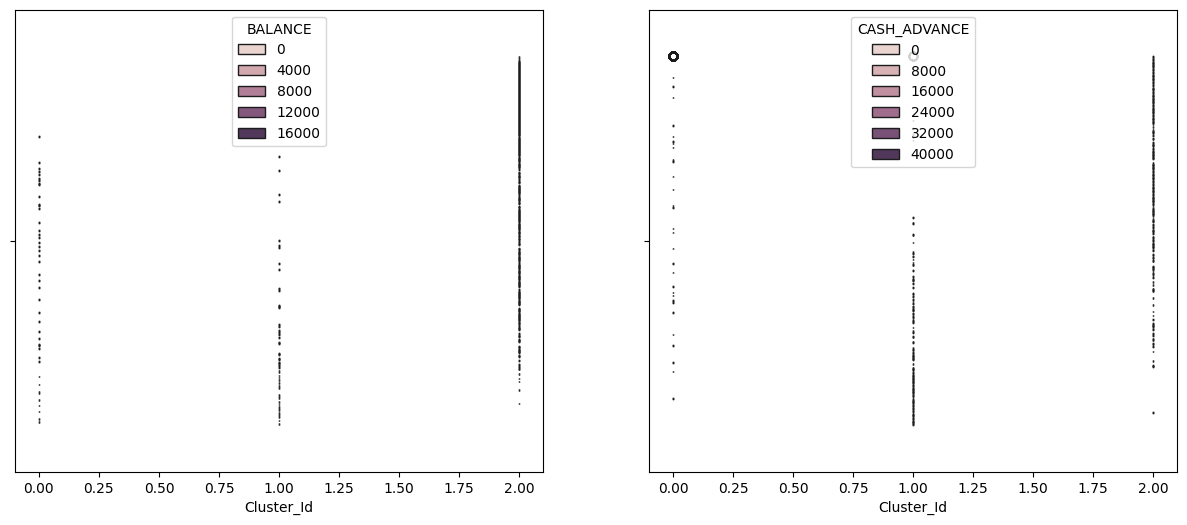

In [53]:
plt.figure(figsize=(15, 6))
#plot 1
plt.subplot(1, 2, 1)
sns.boxplot(x='Cluster_Id', hue='BALANCE', data=data)

#plot 2
plt.subplot(1, 2, 2)
sns.boxplot(x='Cluster_Id', hue='CASH_ADVANCE', data=data)

plt.show()


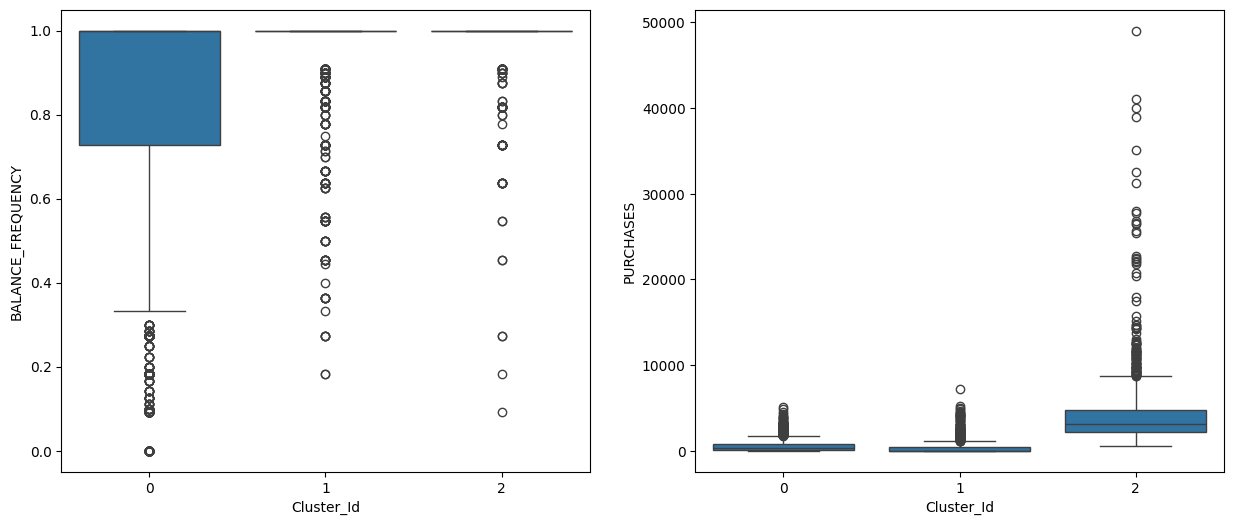

In [28]:
plt.figure(figsize=(15,6))

#plot 1
plt.subplot(1,2,1)
sns.boxplot(x='Cluster_Id', y='BALANCE_FREQUENCY', data=data)

#plot2
plt.subplot(1,2,2)
sns.boxplot(x='Cluster_Id', y='PURCHASES', data=data)

plt.show()

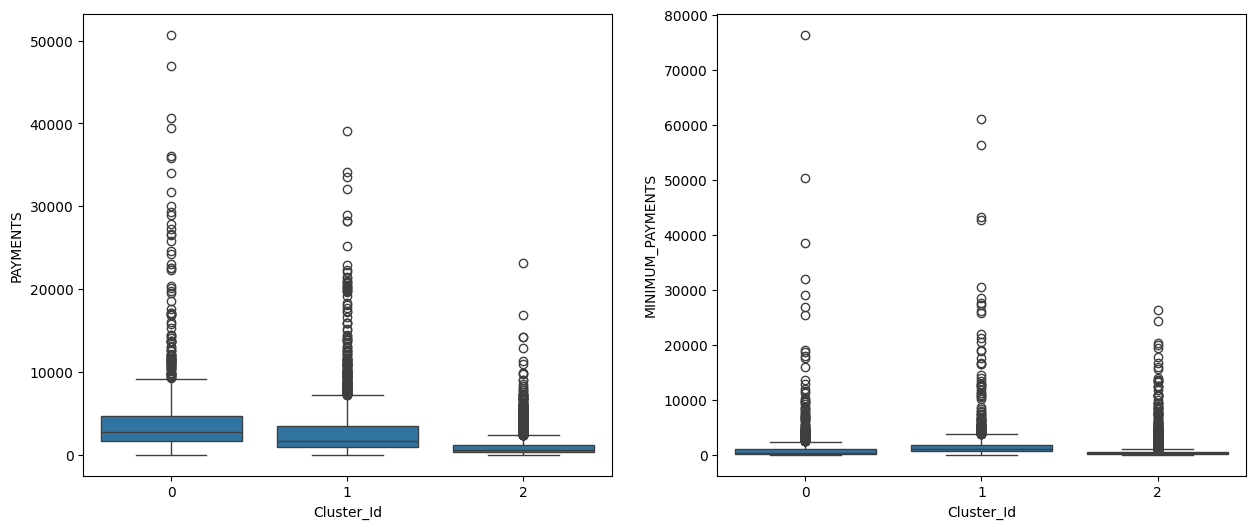

In [54]:
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
sns.boxplot(x='Cluster_Id', y='PAYMENTS', data=data)

plt.subplot(1,2,2)
sns.boxplot(x='Cluster_Id', y='MINIMUM_PAYMENTS', data=data)
plt.show()

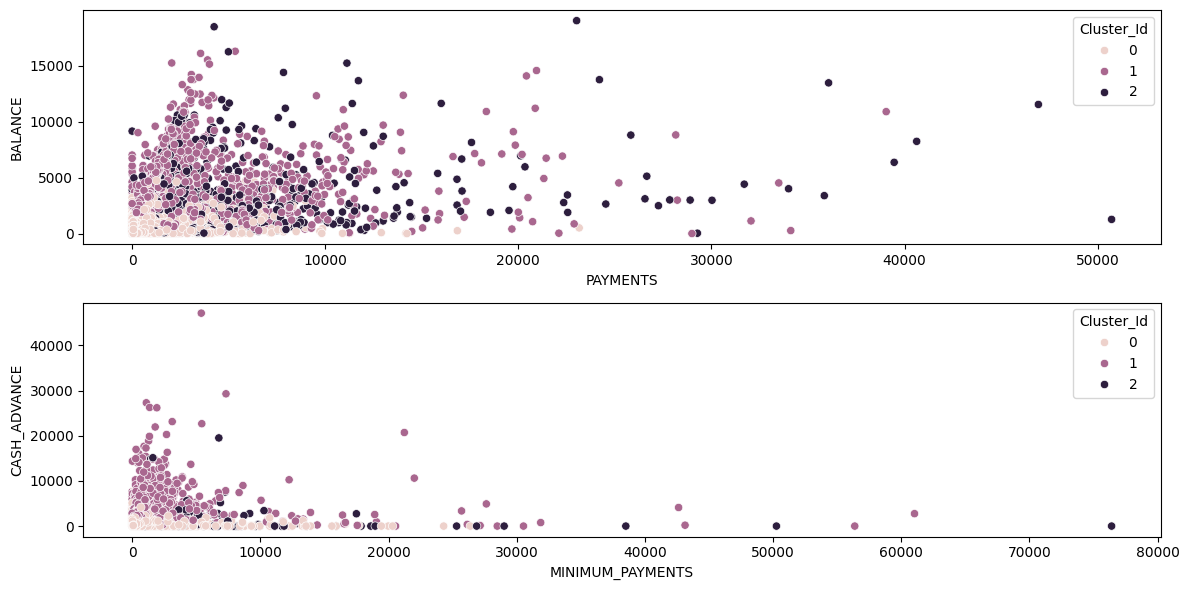

In [46]:

plt.figure(figsize=(12, 6))

# Plot 1
plt.subplot(2, 1, 1)
sns.scatterplot(data=data, x='PAYMENTS', y='BALANCE', hue='Cluster_Id')

# Plot 2
plt.subplot(2, 1, 2)
sns.scatterplot(data=data, x='MINIMUM_PAYMENTS', y='CASH_ADVANCE', hue='Cluster_Id')

plt.tight_layout() 
plt.show()


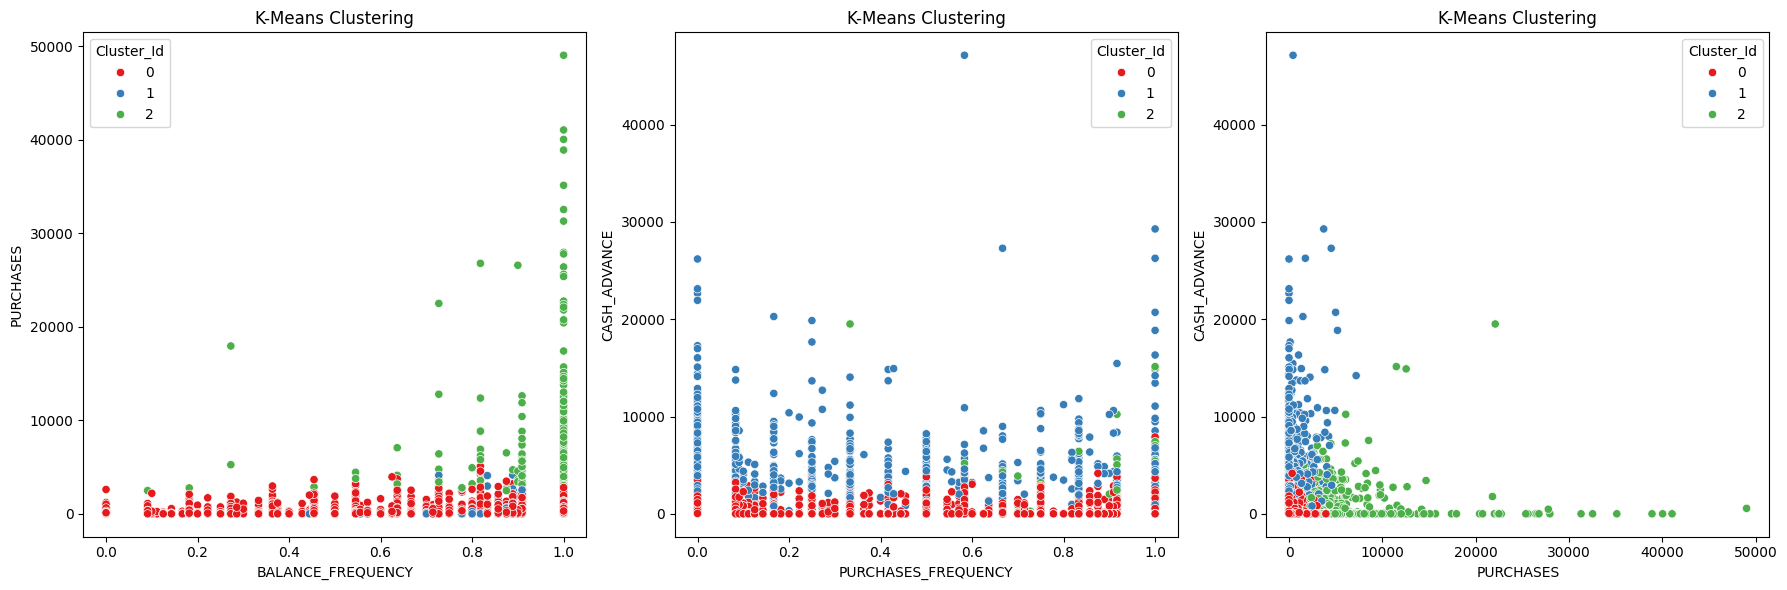

In [33]:
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
sns.scatterplot(data=data, x='BALANCE_FREQUENCY', y='PURCHASES', hue='Cluster_Id', palette='Set1')
plt.title('K-Means Clustering')

plt.subplot(1, 3, 2)
sns.scatterplot(data=data, x='PURCHASES_FREQUENCY', y='CASH_ADVANCE', hue='Cluster_Id', palette='Set1')
plt.title('K-Means Clustering')

plt.subplot(1, 3, 3)
sns.scatterplot(data=data, x='PURCHASES', y='CASH_ADVANCE', hue='Cluster_Id', palette='Set1')
plt.title('K-Means Clustering')

plt.tight_layout()  
